<a href="https://colab.research.google.com/github/pterw/Genomic-Projects/blob/Assignments/Assignment_5_8605690.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identify yourself here:

Student name: Peter Wiercioch

Student number: 8605690

# BIO3360 Assignment 5#

## A gentle introduction to dynamical systems  ##

The purpose of this assignment is to use principles of dynamical systems theory to analyze systems of ODEs used in computational biology. We will here revisit concepts such as fixed points, nullclines and stability, and support the solutions numerically to validate and explore them systematically. 

IMPORTANT REMINDER: Copy-pasting code found online will be considered as plagiarism. And this is easy to verify (trust me!).  

Below is a series of questions that need to be answered. Your "answers" are to be written in the code cells below the question statements. To get points, the output of your code cell must match the expected answer. If you need to anotate your code cell, or make comments use `#` before your comment. The line will be ignored by the compiler, but remain visible. E.g. `#this is a comment`

**Word of caution: Colab's compiler keep track of assignments, even if they are in different code cells. This means that if you make changes to a variable in a cell, it will impact how this variable is used in all other cells. To avoid mixing them up, you can either change your variable names in every code cell, or redefine them at the value you want at the beginning of every new code cell. Note that this hold not only for variables but also functions, libraries etc that were defined in a previous code cell. As mentioned before, that works because all required information is stored in memory. It is critical that you remain aware of the implications of this...especially when you having been working on an assignment, or other code, for a long time!**

First, please write your name and student number in the text cell above.

##Question 1 (1 points)

Consider the exponential growth model with birth and death rates $a>0$ and $b>0$

$$\frac{dX}{dt} =(a-b)X$$

a) (0.5 point) What is the fixed point of this equation? `#type your answer as a commentary in the code cell below`.

b) (0.5 point) On which condition on $a$ and $b$ does the equation above converges to the fixed point?  And diverges? In each case, write whether the fixed point is stable or unstable. (HINT: You can either solve the equation analytically, or use numerical methods to explore its dynamics)`#type your answer as a commentary in the code cell below`.

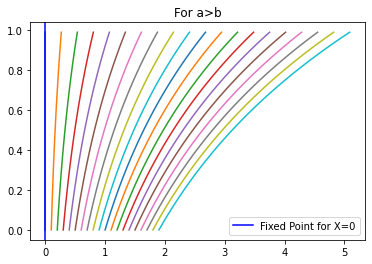

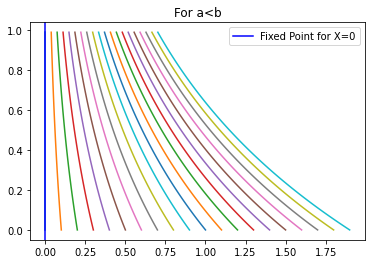

In [ ]:
#a)

# X = 0, a = b

#b) 

#We can see that for a > b the equation diverges from the fixed point. 
#When a < b, it converges to the fixed point.
# a > b = unstable
# a < b = stable


import numpy as np
import matplotlib.pyplot as plt

icstep=0.1        
icmax=2          
tmax=1    
dt=0.01

a=2
b=1

t=np.arange(0,tmax,dt)
X=np.zeros(len(t))

for i in np.arange(0,icmax,icstep):
    X[0]=i
    for k in range (len(t)-1):
      X[k+1]=X[k]+dt*((a-b)*X[k])
    plt.plot(X,t)
    plt.title('For a>b')
plt.axvline(x=0, color='blue',label='Fixed Point for X=0')
plt.legend()
plt.show()

a=1
b=2

for i in np.arange(0,icmax,icstep):
    X[0]=i
    for k in range (len(t)-1):
      X[k+1]=X[k]+dt*((a-b)*X[k])
    plt.plot(X,t)
    plt.title('For a<b')
plt.axvline(x=0, color='blue',label='Fixed Point for X=0') # fixed point for X = 0
plt.legend()
plt.show()




###Question 2 (4 points)

Consider the following population growth model

$$\frac{dX}{dt} =  X(a-X^2)$$

a) (1 point) How many fixed point does the model has? Find those fixed points. `#type your answer as a commentary in the code cell below`.

b) (1 point) What happens when $a<0$? `#type your answer as a commentary in the code cell below`.

c) (1 point) Using the Euler method, plot the evolution of X as a function of time, over the interval ranging from 0 to a 100, with $dt=0.01$ and a=1. First, consider the initial condition $X(0)=0.1$, and then $X(0)=-0.1$. Where does the solution converges to in each case? `#type your answer as a commentary in the code cell below`.

d) (1 point) Use the initial condition $X(0)=0.1$. At $t=50$, perturb the solution $X(t)$ and apply the perturbation $I=-1.01/dt$ (only once and at that precise value of t). What happens? Describe the behavior of the solution. (HINT: You should use here an `if` conditional statement and your Euler integration line should read `X[t+1] = X[t]+dt*(X[t]*(a-X[t]**2)+I)` )


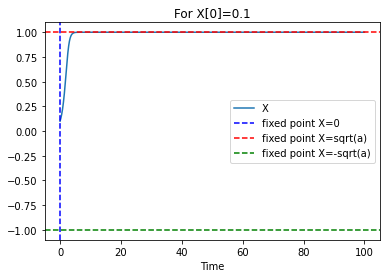

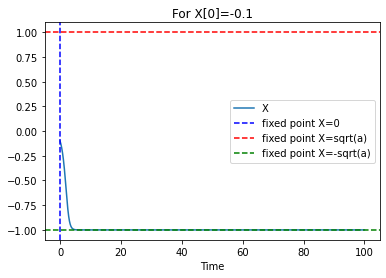

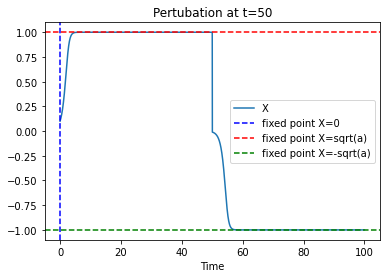

In [ ]:
#a)There are 2 fixed points, X = 0 and X = sqrt(a), X = -sqrt(a)

#b)The solution will continuously increase up to the fixed point sqrt(a).

#c)The solution coverges towards the fixed point for X = sqrt(a) for X[0]=0.1 and towards the fixed point X = -sqrt(a) for X=-0.1

import numpy as np
import matplotlib.pyplot as plt

dt=0.01
a=1
tmax=100

t=np.arange(0,tmax,dt)
X=np.zeros(len(t))

X[0]=0.1
for k in range (len(t)-1):
  X[k+1]=X[k]+dt*X[k]*(a-(X[k])**2)
plt.plot(t,X, label='X')
plt.title('For X[0]=0.1')
plt.axvline(x=0, color='blue', linestyle='--', label='fixed point X=0')
plt.axhline(y=np.sqrt(a), color='red', linestyle='--', label='fixed point X=sqrt(a)')
plt.axhline(y=-(np.sqrt(a)), color='green', linestyle='--', label='fixed point X=-sqrt(a)')
plt.xlabel('Time')
plt.legend()
plt.show()

X[0]=-0.1
for k in range (len(t)-1):
  X[k+1]=X[k]+dt*X[k]*(a-(X[k])**2)
plt.plot(t,X, label='X')
plt.title('For X[0]=-0.1')
plt.axvline(x=0, color='blue', linestyle='--', label='fixed point X=0')
plt.axhline(y=np.sqrt(a), color='red', linestyle='--', label='fixed point X=sqrt(a)')
plt.axhline(y=-(np.sqrt(a)), color='green', linestyle='--', label='fixed point X=-sqrt(a)')
plt.xlabel('Time')
plt.legend()
plt.show()

#d) The solution has logistic behaviour. It begins to converge towards the fixed point X=sqrt(a) but after t=50 it diverges from this point and begins to converge to the fixed point -sqrt(a)

tmax=100
time=np.arange(0,tmax,dt)

a=1

X[0]=0.1
for t in range (len(time)-1):
  if (time[t] == 50):
    I = -1.01/dt
  else:
    I = 0
  X[t+1] = X[t]+dt*(X[t]*(a-X[t]**2)+I)
plt.plot(time,X, label='X')
plt.title('Pertubation at t=50')
plt.axvline(x=0, color='blue', linestyle='--', label='fixed point X=0')
plt.axhline(y=np.sqrt(a), color='red', linestyle='--', label='fixed point X=sqrt(a)')
plt.axhline(y=-(np.sqrt(a)), color='green', linestyle='--', label='fixed point X=-sqrt(a)')
plt.xlabel('Time')
plt.legend()
plt.show()


###Question 3 (5 points)

Consider the following two dimensional predator prey system based on the Lotka Volterra equations (what is different here? Do you notice something familiar?)

$$\frac{dn}{dt} = r n (1-n) - np$$

$$\frac{dp}{dt} = a n - p $$

where, again, $n$ and $p$ correspond to the populations of prey and predators, respectively. This competition model is non linear, and perhaps is it a bit challenging to see its properties simply by looking at the equations. 

a) (1 point) What sort of interaction is this model describing? What sort of dynamics can we expect to see? `#type your answer as a commentary in the code cell below`.

b) (1 point) What are the fixed points for this system?`#type your answer as a commentary in the code cell below`.

c) (1 point) Compute the nullclines of the equation above. Plot those nullclines in $(n,p)$ phase space for $(a,r)=(1,1)$ (REMINDER: the nullclines should intersect at the fixed points found in b)). `#type your answer as a commentary in the code cell below`.

d) (1 point) Using the Euler method and what we have seen in class and in previous assignments, plot the evolution of the variables $n$ and $p$ as a function of time for $(a,r)=(1,1)$ for initial conditions :

$n(0)=0$ ;
$p(0)=0.4$

and 

$n(0)=0.1$ ; 
$p(0)=0.4$.

Towards which fixed point does the system converge in each case? 

e) (1 point) Plot the flow in phase space.(HINT: As seen in class, all is needed is to integrate the system for a small amount of time, say 0.1 with steps of $dt=0.01$. Using two embedded `for` loops, you can simply change the initial conditions and plot the trajectories in $(n,p)$ space iteratively. )

In [ ]:
#a)
#This interaction describes a predator-prey interactions as it is based on the Lotka Volterra equations. Typically, we would expect to see oscilatory behaviour. 
#However, this equation lacks the d parameter which describes the rate at which predators increase by prey consumption. It also lacks the b paramter. This results in this 2-dimensional ODE having logistic behaviour.

#b)For values of a and r = 1, the fixed points are: (n,p) = (0,0),(0.5,0.5)

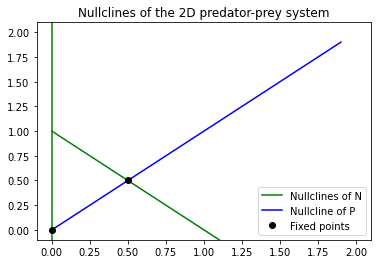

In [ ]:
#c)The nullclines are of (r*(1-N)) and (a*N)

import numpy as np
import matplotlib.pyplot as plt

[a,r]=[1,1]
P=np.arange(0,2,0.1)
N=np.arange(0,2,0.1)

null_n1=(r*(1-N))*np.ones(len(N))
null_p1=(a*N)*np.ones(len(N)) 

plt.axvline(x=0, color='green') #Nullcline at N=0
plt.plot(N,null_n1, color='green',label='Nullclines of N')
plt.plot(P,null_p1,color='blue',label='Nullcline of P')

plt.ylim(-0.25,2.5)
plt.xlim(-0.25,2.5)

plt.ylim(-0.1,2.1)
plt.xlim(-0.1,2.1)
plt.plot(0.5,0.5, 'ko',label='Fixed points')
plt.plot(0,0, 'ko')

plt.legend()
plt.title('Nullclines of the 2D predator-prey system')
plt.show()

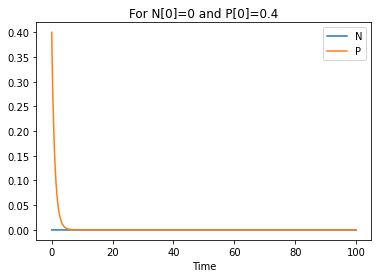

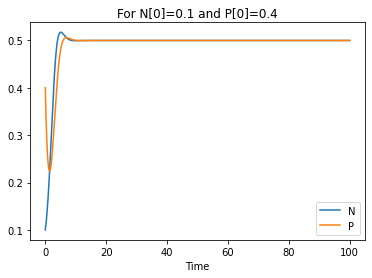

In [ ]:
#d)

import numpy as np
import matplotlib.pyplot as plt

[a,r]=[1,1]

tmax = 100
dt = 0.001
time=np.arange(0,tmax,dt)


N=np.zeros(len(time))
P=np.zeros(len(time))

N[0]=0
P[0]=0.4

for i in range (len(time)-1):
  N[i+1] = N[i] + dt*(r*N[i]*(1-N[i])-N[i]*P[i])
  P[i+1] = P[i] + dt*(a*N[i]-P[i])

plt.title('For N[0]=0 and P[0]=0.4')
plt.plot(time,N,label='N')
plt.plot(time,P,label='P')
plt.xlabel('Time')
plt.legend()
plt.show()
#The system converges to the fixed point 0

plt.title('For N[0]=0.1 and P[0]=0.4')
N[0]=0.1
P[0]=0.4

for i in range (len(time)-1):
  N[i+1] = N[i] + dt*(r*N[i]*(1-N[i])-N[i]*P[i])
  P[i+1] = P[i] + dt*(a*N[i]-P[i])

plt.plot(time,N,label='N')
plt.plot(time,P,label='P')
plt.xlabel('Time')
plt.legend()
plt.show()
#The system converges to the fixed point 0.5

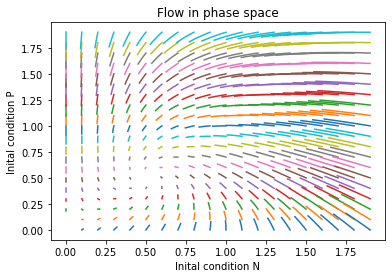

In [ ]:
#e)

import numpy as np
import matplotlib.pyplot as plt

icstep=0.1      
icmax=2       
tmax=0.1    
dt=0.01
[a,r]=[1,1]

t=np.arange(0,tmax,dt)
N=np.zeros(len(t))
P=np.zeros(len(t))

for i in np.arange(0,icmax,icstep):
  for j in np.arange(0,icmax,icstep):
    N[0]=i
    P[0]=j
    for k in range (len(t)-1):
      N[k+1] = N[k] + dt*(r*N[k]*(1-N[k])-N[k]*P[k])
      P[k+1] = P[k] + dt*(a*N[k]-P[k])
    plt.plot(N,P)
plt.title('Flow in phase space')
plt.ylabel('Inital condition P')
plt.xlabel('Inital condition N')
plt.show()